# Test the algorithm to draw random Plummer distances

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [49]:
def getd2D(rPlummer):

    X1 = np.random.random(len(rPlummer))
    X2 = np.random.random(len(rPlummer))
    X3 = np.random.random(len(rPlummer))
    zeta = (X1**(-2/3.) - 1.)**(-0.5)
    r = zeta*rPlummer
    #this is a 3D r; we need to make this 2D
    z = 2.*r*X2 - r
    x = (r**2. - z**2.)**0.5*np.cos(X3*2.*np.pi)
    y = (r**2. - z**2.)**0.5*np.sin(X3*2.*np.pi)
    d2D = (x**2. + y**2.)**0.5
    
    return d2D

In [50]:
rh = 2.
rPlummer = rh*(2**(2./3.) - 1.)**0.5
Nvals = 1e5
mass = 1.

In [51]:
d2D = getd2D(np.ones(int(Nvals))*rPlummer)

#projected mass density
d = np.linspace(0,10,1000)
massDensity = mass/(np.pi*rPlummer**2.)*(1. + d**2./rPlummer**2.)**-2. #Msun/pc**2.

In [52]:
N, binEdges = np.histogram(d2D, bins=100, range=(0,10))
db = binEdges[1] - binEdges[0]
areas = []
for i in range(len(binEdges)-1):
    areas.append(np.pi*(binEdges[i+1]**2. - binEdges[i]**2.))
areas = np.array(areas)

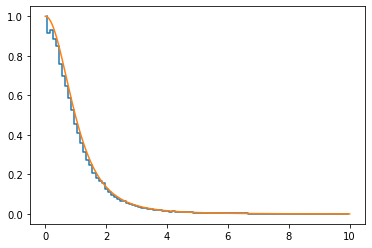

In [53]:
f,ax = plt.subplots()

sigma = N/areas
ax.step(binEdges[:-1] + db/2., sigma/max(sigma))
ax.plot(d, massDensity/max(massDensity))